## Predicting Players Rating

In [1]:
#Import Libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

In [2]:
##Read the Datset
df=pd.read_csv('nba_2013.csv')

In [3]:
## Read the Data
# cnx = sqlite3.connect('database.sqlite')
# df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [4]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


#### Data Understanding

In [5]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [7]:
df.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [8]:
df.shape

(481, 31)

In [9]:
df.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

#### Player Name and bref_team_id adds no vaue in the dataset, so dropping it

In [10]:
df.drop(['player','bref_team_id'],axis=1,inplace=True)

#### Treating Categorical Variables.

In [11]:
df.pos.unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [12]:
df_pos=pd.get_dummies(data=df['pos'],prefix='pos_',drop_first=True)
df_sess=pd.get_dummies(data=df['season'],prefix='sess_',drop_first=True)

In [14]:
df.drop(['pos','season'],axis=1,inplace=True)

In [15]:
df=pd.concat([df,df_pos,df_sess],axis=1)

In [16]:
df.shape

(481, 33)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 33 columns):
age           481 non-null int64
g             481 non-null int64
gs            481 non-null int64
mp            481 non-null int64
fg            481 non-null int64
fga           481 non-null int64
fg.           479 non-null float64
x3p           481 non-null int64
x3pa          481 non-null int64
x3p.          414 non-null float64
x2p           481 non-null int64
x2pa          481 non-null int64
x2p.          478 non-null float64
efg.          479 non-null float64
ft            481 non-null int64
fta           481 non-null int64
ft.           461 non-null float64
orb           481 non-null int64
drb           481 non-null int64
trb           481 non-null int64
ast           481 non-null int64
stl           481 non-null int64
blk           481 non-null int64
tov           481 non-null int64
pf            481 non-null int64
pts           481 non-null int64
season_end    481 non-null 

In [24]:
df.isnull().sum().sum()

94

In [30]:
df.fillna(df.mean(),inplace=True)

In [31]:
df.isna().sum().sum()

0

In [32]:
df.head(2)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,tov,pf,pts,season_end,pos__F,pos__G,pos__PF,pos__PG,pos__SF,pos__SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,30,122,171,2013,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,71,203,265,2013,0,0,0,0,0,0


#### Defining Input and Output Features

In [63]:
X = df.loc[:,df.columns!='pts']
y=df.iloc[:,df.columns.get_loc("pts")]

In [64]:
y.describe()

count     481.000000
mean      516.582121
std       470.422228
min         0.000000
25%       115.000000
50%       401.000000
75%       821.000000
max      2593.000000
Name: pts, dtype: float64

(array([191.,  93.,  64.,  58.,  43.,  16.,   9.,   4.,   2.,   1.]),
 array([   0. ,  259.3,  518.6,  777.9, 1037.2, 1296.5, 1555.8, 1815.1,
        2074.4, 2333.7, 2593. ]),
 <a list of 10 Patch objects>)

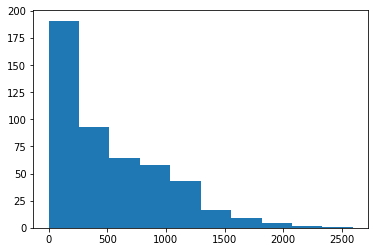

In [65]:
plt.hist(y) ## range is min and max from above

#### Split the Data into Test and Train Dataset

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Model Building & Evaluation

#### Applying DecisionTree

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dtr = DecisionTreeRegressor()

In [71]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [72]:
dprediction = dtr.predict(X_test)

In [73]:
print('The Mean Sqaured Error is : ', mean_squared_error(dprediction,y_test))
print('The Mean Absolute Error is : ', mean_absolute_error(dprediction,y_test))
print('The Model accuracy/r2 Score using Decision Tree Algorithm is ', r2_score(dprediction,y_test))

The Mean Sqaured Error is :  10173.310344827587
The Mean Absolute Error is :  48.73103448275862
The Model accuracy/r2 Score using Decision Tree Algorithm is  0.9517351106529923


#### Applying RandomForest

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rfc = RandomForestRegressor(n_jobs=-1)

In [76]:
rfc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [77]:
prediction = rfc.predict(X_test)

In [78]:
print('The Mean Sqaured Error is : ', mean_squared_error(prediction,y_test))
print('The Mean Absolute Error is : ', mean_absolute_error(prediction,y_test))
print('The Model accuracy/r2 Score using Random Decision Tree Algorithm is ', r2_score(prediction,y_test))

The Mean Sqaured Error is :  9861.707724137928
The Mean Absolute Error is :  42.11310344827586
The Model accuracy/r2 Score using Random Decision Tree Algorithm is  0.9528178720187084


##### RANDOM FOREST - CROSS_VAL_SCORE

In [79]:
rfcv = RandomForestRegressor(n_estimators=10, criterion='mse',n_jobs=-1)

In [80]:
from sklearn.model_selection import cross_val_score

In [82]:
rfcscore = cross_val_score(rfcv,X,y,cv=10)
rfcscore

array([0.98107941, 0.98514367, 0.97157533, 0.99160422, 0.98895911,
       0.98752627, 0.99185588, 0.9873609 , 0.99432322, 0.97390973])

In [83]:
np.mean(rfcscore)

0.9853337747902206

### Applying XGBoost

In [84]:
import xgboost
from xgboost.sklearn import XGBRegressor

In [85]:
xgb = XGBRegressor()

In [86]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [87]:
xgb_predictions = xgb.predict(X_test)

In [88]:
print('The Mean Sqaured Error is : ', mean_squared_error(xgb_predictions,y_test))
print('The Mean Absolute Error is : ', mean_absolute_error(xgb_predictions,y_test))
print('The Model accuracy/r2 Score using XGBoost Algorithm is ', r2_score(xgb_predictions,y_test))

The Mean Sqaured Error is :  5710.274720697297
The Mean Absolute Error is :  31.155910373556203
The Model accuracy/r2 Score using XGBoost Algorithm is  0.9736482087798356


#### Applying K Nearest Neighbour

In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [106]:
knn = KNeighborsRegressor()
sc=StandardScaler()
scaled= sc.fit(X_train)
scaled_features=scaled.transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [112]:
knnmodel = KNeighborsRegressor(n_neighbors=43)
knnmodel.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=43, p=2,
          weights='uniform')

In [113]:
knn_predictions=knnmodel.predict(X_test)

In [114]:
print('The Mean Sqaured Error is : ', mean_squared_error(knn_predictions,y_test))
print('The Mean Absolute Error is : ', mean_absolute_error(knn_predictions,y_test))
print('The Model accuracy/r2 Score using K Nearest Neighbor Algorithm is ', r2_score(knn_predictions,y_test))

The Mean Sqaured Error is :  30286.904981257343
The Mean Absolute Error is :  87.85661587810746
The Model accuracy/r2 Score using K Nearest Neighbor Algorithm is  0.8014469058575181


### After Applying all the algorithms, it can be concluded that Random Forest Algorithm is performing best in the given dataset